<a href="https://colab.research.google.com/github/Shi-raishi/CNN_triathlon/blob/main/mission4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project Name    : Machine Learning
 
 File Name       : Trial.ipynb
 
 Creation Date   : Jun 9 2021
 
 Copyright (c) 2021 KAMAKE no SUSUME. All rights reserved.
 
 This source code or any portion thereof must not be reproduced or used in any manner whatsoever.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Trial

/content/drive/MyDrive/Colab Notebooks/Trial


In [ ]:
# %run prepare_images.py datasets/triathlon_sets

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize

print(tf.__version__)

train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.9.1
class number=3
['bike_2', 'run_2', 'swim_2']


Found 192 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
## Train Data Sample ##


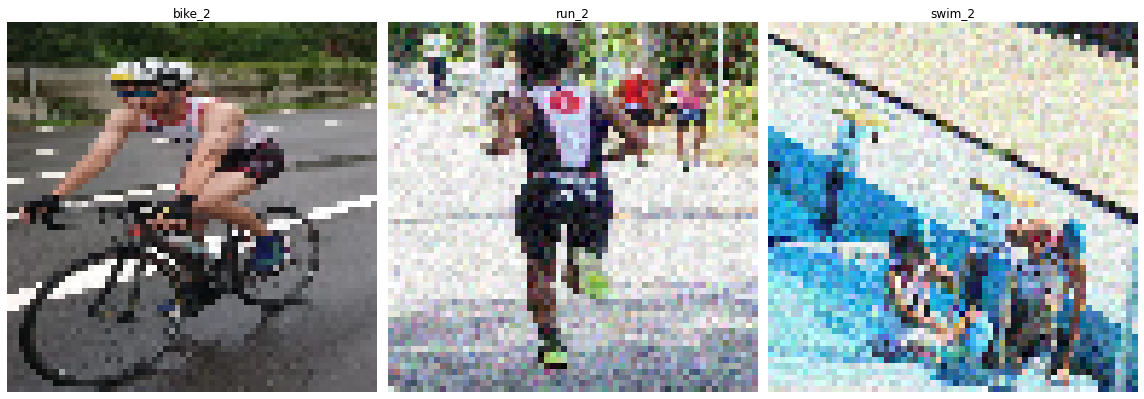

In [ ]:
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 32
# バッチサイズ
BATCH_SIZE = 4

IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255)
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180)
val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))

# 1Layer
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2Layer
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3Layer
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4Layer
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# # 5Layer
# model.add(Conv2D(8, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))


# ドロップアウト値の変更
model.add(Dropout(0.6))

# Flatten：全結合の為に、2次元配列を1次元に置き換える
model.add(Flatten())
# 全結合層の追加
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Prediction data
[[0.997 0.003 0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.202 0.144 0.654]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.041 0.84  0.119]
 [0.    0.998 0.002]
 [0.    0.24  0.759]
 [0.003 0.995 0.002]
 [0.    0.997 0.003]
 [0.966 0.033 0.001]
 [0.    1.    0.   ]
 [0.    0.944 0.056]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.002 0.998]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.007 0.993]]
(24, 3)
#0 Expected:bike_2 -> Predicted:bike_2
File: bike_2/LINE_ALBUM_220817_12.jpg
Each Prediction Value: [0.997 0.003 0.   ]
* Correct *
#1 Expected:bike_2 -> Predicted:bike_2
File: bike_2/LINE_ALBUM_220817_15.jpg
Each Prediction Value: [1. 0. 0.]
* Correct *
#2 Expected:bike_2 -> Predicted:bike_2
File: bike_2/LINE_ALBUM_220817_16.jpg
Each Prediction Value: [1. 0. 0.]
* Correct *
#3 Expected:bike_2 -> Predicted:bike_2
File: bike_2/LINE_ALBUM_220817_22.jpg
Each Prediction 

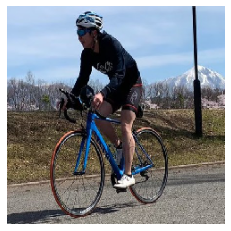

#5 Expected:bike_2 -> Predicted:bike_2
File: bike_2/LINE_ALBUM_220817_3.jpg
Each Prediction Value: [1. 0. 0.]
* Correct *
#6 Expected:bike_2 -> Predicted:bike_2
File: bike_2/LINE_ALBUM_220817_5.jpg
Each Prediction Value: [1. 0. 0.]
* Correct *
#7 Expected:bike_2 -> Predicted:bike_2
File: bike_2/LINE_ALBUM_220817_8.jpg
Each Prediction Value: [1. 0. 0.]
* Correct *
#8 Expected:run_2 -> Predicted:run_2
File: run_2/LINE_ALBUM_2019714_220817.jpg
Each Prediction Value: [0.041 0.84  0.119]
* Correct *
#9 Expected:run_2 -> Predicted:run_2
File: run_2/LINE_ALBUM_220817_129.jpg
Each Prediction Value: [0.    0.998 0.002]
* Correct *
#10 Expected:run_2 -> Predicted:swim_2
File: run_2/LINE_ALBUM_220817_14.jpg
Each Prediction Value: [0.    0.24  0.759]
**** INCORRECT ****


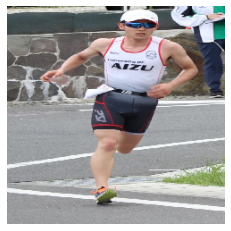

#11 Expected:run_2 -> Predicted:run_2
File: run_2/LINE_ALBUM_220817_19.jpg
Each Prediction Value: [0.003 0.995 0.002]
* Correct *
#12 Expected:run_2 -> Predicted:run_2
File: run_2/LINE_ALBUM_220817_2.jpg
Each Prediction Value: [0.    0.997 0.003]
* Correct *
#13 Expected:run_2 -> Predicted:bike_2
File: run_2/LINE_ALBUM_220817_29.jpg
Each Prediction Value: [0.966 0.033 0.001]
**** INCORRECT ****


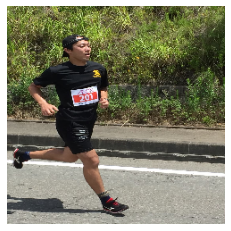

#14 Expected:run_2 -> Predicted:run_2
File: run_2/LINE_ALBUM_220817_36.jpg
Each Prediction Value: [0. 1. 0.]
* Correct *
#15 Expected:run_2 -> Predicted:run_2
File: run_2/LINE_ALBUsM_220817.jpg
Each Prediction Value: [0.    0.944 0.056]
* Correct *
#16 Expected:swim_2 -> Predicted:swim_2
File: swim_2/LINE_ALBUM_220817_14.jpg
Each Prediction Value: [0. 0. 1.]
* Correct *
#17 Expected:swim_2 -> Predicted:swim_2
File: swim_2/LINE_ALBUM_220817_17.jpg
Each Prediction Value: [0. 0. 1.]
* Correct *
#18 Expected:swim_2 -> Predicted:swim_2
File: swim_2/LINE_ALBUM_220817_18.jpg
Each Prediction Value: [0. 0. 1.]
* Correct *
#19 Expected:swim_2 -> Predicted:swim_2
File: swim_2/LINE_ALBUM_220817_2.jpg
Each Prediction Value: [0. 0. 1.]
* Correct *
#20 Expected:swim_2 -> Predicted:swim_2
File: swim_2/LINE_ALBUM_220817_22.jpg
Each Prediction Value: [0.    0.002 0.998]
* Correct *
#21 Expected:swim_2 -> Predicted:swim_2
File: swim_2/LINE_ALBUM_220817_3.jpg
Each Prediction Value: [0. 0. 1.]
* Correct *


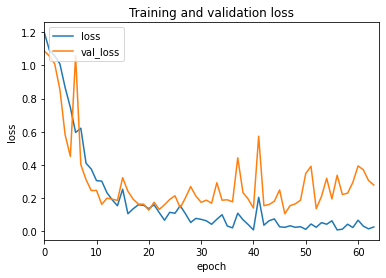

Accuracy


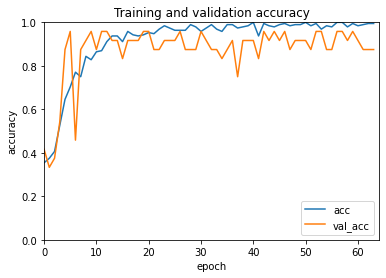

Confusion Matrix


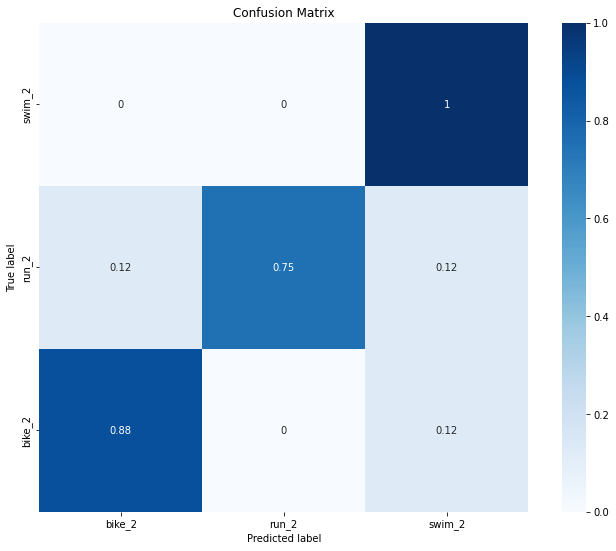

In [ ]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)

Visualize filter: conv2d


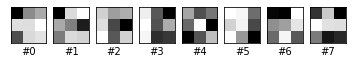

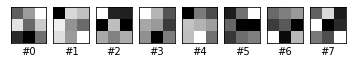

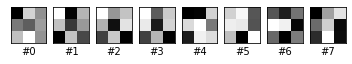

In [ ]:
visualize.vis_filter(model, 'conv2d')

In [ ]:
!cat incorrect.txt

target_datasets/val/bike_2/LINE_ALBUM_220817_29.jpg
target_datasets/val/run_2/LINE_ALBUM_220817_14.jpg
target_datasets/val/run_2/LINE_ALBUM_220817_29.jpg


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 8)       224       
                                                                 
 activation (Activation)     (None, 244, 244, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 242, 242, 8)       584       
                                                                 
 activation_1 (Activation)   (None, 242, 242, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 8)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 119, 8)       584       
                                                        

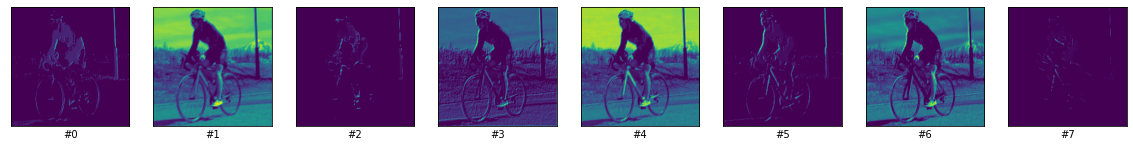

target_datasets/val/run_2/LINE_ALBUM_220817_14.jpg


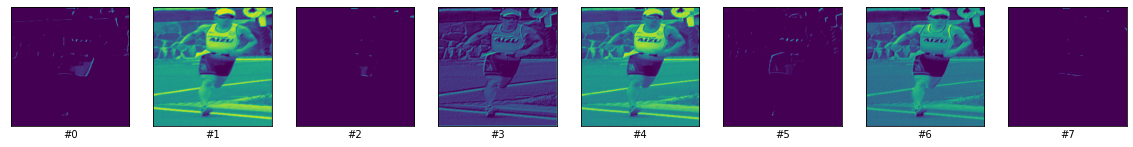

target_datasets/val/run_2/LINE_ALBUM_220817_29.jpg


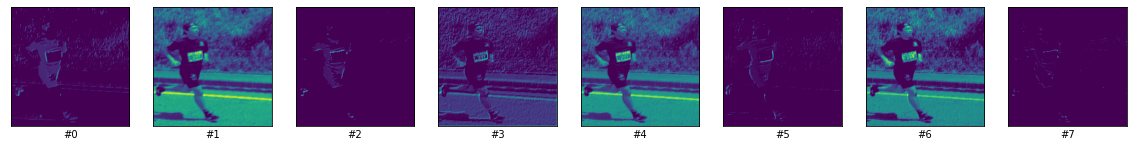

In [ ]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_1', IMAGE_SIZE)